<a href="https://colab.research.google.com/github/2006355/ALICE1/blob/master/Coursework_ComputerVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Version Medical data
## Introduction
The problem that we face is use medcial data from a chasted X-Ray images described and analyzed by using deeplearning technique. such as CNN which takes an image and classify them into catorgories which can distinguest them from a normal and pneumonia. The overall objective is to show that the disgust between a normal chast and PNEUMONIA which can look decision and classifiy from the model.

In [57]:
from google.colab import drive
import pandas as pd
import numpy
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Research
 
###Introduction
The paper(Hashmi et al., 2020)studies how 7% of the world's child population can be effect by pneumonia every year. The paper looks at how deep learning techniques can help the network to predict results on the dataset quality used. The paper uses a technique called transfer learning to fine-tune the models. The results of the experiment test accuracy of the models have achieved 98.43%. The paper suggests that with transfer learning, CNN can diagnose pneumonia quickly and accurately.  
### Methods Presented
A convolutional Neural Network (CNN) was used to detect pneumonia in the chest. The reason why the experiment used this type of network(LeCun et al.) was that it was able to take features automatically. The network architecture has two convolution layers, two pooling layers, and the output layer, a SoftMax layer. The dataset used is the chest X-ray which had 5836 images. The dataset was split into two main parts a normal and an infected chest; both have a training set and a test set. The paper found that the two sets were highly imbalanced, so the programme shuffled the data of both sets, meaning that 11.95% was used for testing. Five states of the art pre-trained Deep Learning neuron network models are used "ResNet 18"( K. He, X. Zhang, S. Ren and J. Sun, 2016), "DenseNet121"( T. -W. Weng, H. Zhang, P. -Y. Chen, A. Lozano, C. -J. Hsieh and L. Daniel,2018), "InceptionV3 " (Szegedy, C.; Vanhoucke, V.; Ioffe, S.; Shlens, J.; Wojna, Z.,2016), and "Xception"( Chollet, F,2017).

The required preprocessing methods were to resize the images and use normalization. To help not to overfit the model, "Data argumentation" was used to increase the "normal" training set from 1283 to 3399 images and decrease the infected chests from 3873 to 3623; 400 images were used for the weight classifier. The Other technique to help is to rotate 45, vertical shift 0.2, horizontal shift 0.15, Shear 16, crop and Pad 0.25. The number of epochs was 25. Furthermore, the learning rate is 0.001.   

### Results
To obtain the results, a standard PC with 8GB RAM, NVIDIA GeForce GTX 1060 6GB GPU and intel i7, a seventh-generation processor. To summarise the result, the network with the maximum test accuracy and test loss was the DenseNet121( T. -W. Weng, et.al,2018),  which was 98.43, and the testing loss was 0.062. The confusion matrix shows 290 as a true positive (normal) and a false positive as 390(infected).
### Limitation of the Work 
The paper (Hashmi et al., 2020) describes one of the limitations of this experiment was the availability of data. The paper believes that if the images can increase in volume, then it can decrease the chance of overfitting. Another limitation of the experiment is that an understanding of a radiological feature can be visible. To make the model more efficient and a model that considers the patient's history. The history can help the model look at the correct possible solution for that patient.

## Biblography
1. He,  K.;  Zhang,  X.;  Ren,  S.;  Sun,  J.   Deep residual learning for image recognition.In Proceedings ofthe Conference on Computer Vision and Pattern Recognition, Las Vegas, NV, USA, 26 June–1 July 2016;pp. 770–778
Chollet, F. 
2. Xception: Deep learning with depthwise separable convolutions.  In Proceedings of the IEEEConference on Computer Vision and Pattern Recognition, Honolulu, HI, USA, 21–26 July 2017; pp. 1251–1258
3. Szegedy, C.; Vanhoucke, V.; Ioffe, S.; Shlens, J.; Wojna, Z. Rethinking the inception architecture for computervision.  In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition, Las Vegas,NV, USA, 26 June–1 July 2016; pp. 770–778
4. T. -W. Weng, H. Zhang, P. -Y. Chen, A. Lozano, C. -J. Hsieh and L. Daniel, "ON EXTENSIONS OF CLEVER: A NEURAL NETWORK ROBUSTNESS EVALUATION ALGORITHM," 2018 IEEE Global Conference on Signal and Information Processing (GlobalSIP), Anaheim, CA, USA, 2018, pp. 1159-1163, doi: 10.1109/GlobalSIP.2018.8646356
5. H. Ali-Ahmad et al., "CROWD: An SDN Approach for DenseNets," 2013 Second European Workshop on Software Defined Networks, Berlin, Germany, 2013, pp. 25-31, doi: 10.1109/EWSDN.2013.11
6. K. He, X. Zhang, S. Ren and J. Sun, "Deep Residual Learning for Image Recognition," 2016 IEEE Conference on Computer Vision and Pattern Recognition (CVPR), Las Vegas, NV, USA, 2016, pp. 770-778, doi: 10.1109/CVPR.2016.90 
Hashmi, M. F., 
7. Katiyar, S., Keskar, A. G., Bokde, N. D., & Geem, Z. W. (2020). Efficient Pneumonia Detection in Chest Xray Images Using Deep Transfer Learning. Diagnostics, 10(6), 417. https://doi.org/10.3390/diagnostics10060417
 
8. Y. LeCun et al., "Backpropagation Applied to Handwritten Zip Code Recognition," in Neural Computation, vol. 1, no. 4, pp. 541-551, Dec. 1989, doi: 10.1162/neco.1989.1.4.541


note: the impact factor is lower 3.992 for the jounral but eyhad approved for on the 10/03/23

#Data Exploration


##loading data

In [58]:
#import the required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from matplotlib.image import imread 
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, AveragePooling2D,Flatten, Dense, Conv2D,MaxPool2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [59]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


looking at the folders
the

In [60]:
main_dirction_path ='/content/gdrive/MyDrive/ColabNotebooks/cOMPUTERVERSION/chest_xray'
print(os.listdir(main_dirction_path))

['test', 'train', 'val']


In [61]:
# path for train/ test and validate folders
train_folder_path = main_dirction_path + '/train/'
test_folder_path = main_dirction_path + '/test/'
val_folder_path = main_dirction_path + '/val/'

this helps with class distrubation that show that they are only two CLASS IN EACH Folder "Normal"  and "Pneumonia"

In [62]:
train_n_path = train_folder_path+'/NORMAL/'
train_p_path = train_folder_path+'/PNEUMONIA/'

test_n_path = test_folder_path+'/NORMAL/'
test_p_path = test_folder_path+'/PNEUMONIA/'

In [63]:
print(f'Number of normal images is {len(os.listdir(test_n_path))}') 
print(f'Number of positive images is {len(os.listdir(test_p_path))}') 
print(f'Total training images is {len(os.listdir(test_n_path)) + len(os.listdir(test_p_path))}') 

Number of normal images is 234
Number of positive images is 396
Total training images is 630


setting the images to the same size because it needs to be done for the data distubation 

In [64]:
labels = os.listdir(train_folder_path)
img_size = 224 
batch_size = 16
n_epochs = 30 
labels

['NORMAL', 'PNEUMONIA']

In [65]:
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [66]:
import os,signal
#os.kill(os.getpid(),signal.SIGKILL)

### Validation Set

Now, we load the training set, but we need to split it into train and validation, this is simply because the original val set in this dataset is relatively small:

In [68]:
train = get_training_data(train_folder_path)
temp = np.random.permutation(train) # Shuffle the data
train_size = 0.8 # Sets the split ratio

# Assigns 80% to training array and 20% to validation set
train, val = temp[:(int(train_size*len(temp)))], temp[int(train_size*len(temp)):]


test data

In [69]:
test = get_training_data(test_folder_path)

In [70]:
print(f'The shape of the training set is {train.shape}') 
print(f'The shape of the test set is {test.shape}') 
print(f'The shape of the val set is {val.shape}') 

The shape of the training set is (4185, 2)
The shape of the test set is (630, 2)
The shape of the val set is (1047, 2)


Class disturbation 

<Axes: ylabel='count'>

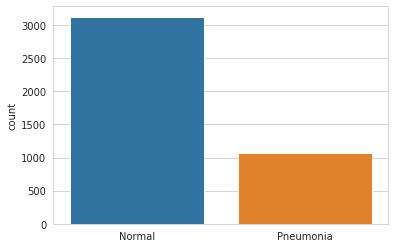

In [71]:

l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")

sns.countplot(x=l)  

<Axes: ylabel='count'>

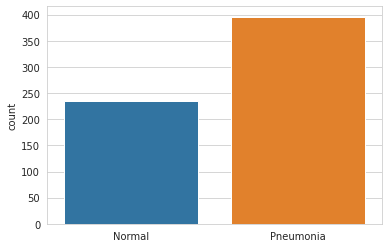

In [72]:
l = []
for i in test:
  if(i[1] == 0):
     l.append("Normal")
  else:
    l.append("Pneumonia")
sns.set_style('whitegrid')
sns.countplot(x=l)

### explore images
Look different images in the data set.

In [73]:
import cv2 as cv2
from PIL import Image

(1040, 1272)
(1104, 1328)
(1302, 1564)
(1416, 1736)
(928, 1288)
(1104, 1240)
(1416, 1776)
(1225, 1632)


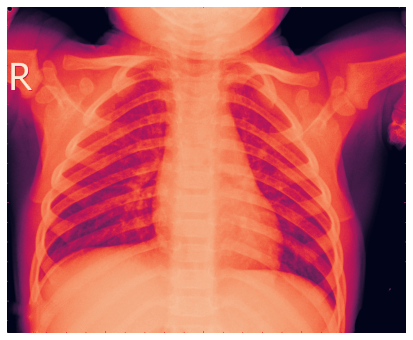

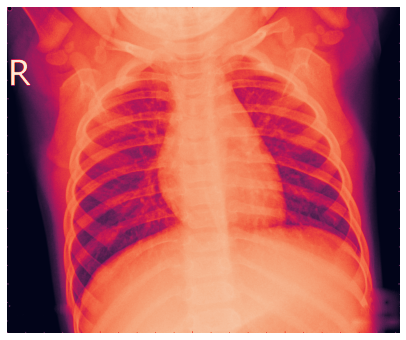

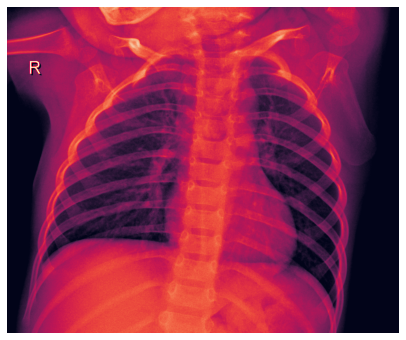

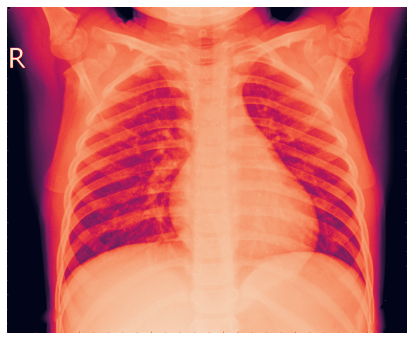

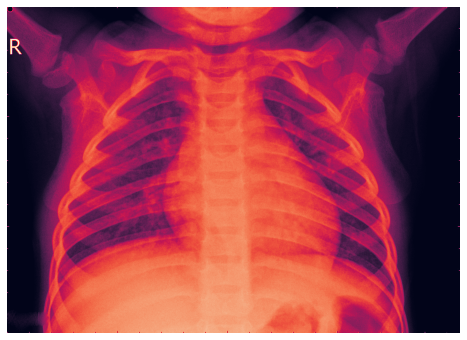

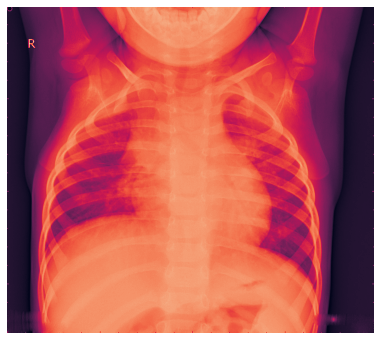

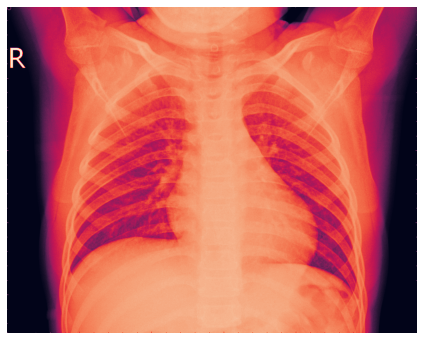

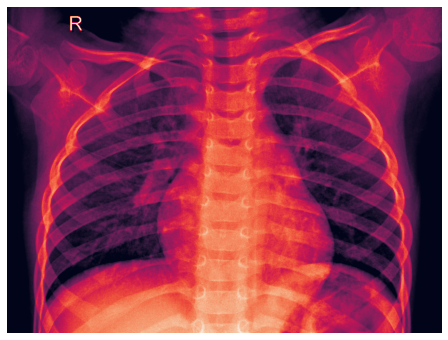

In [74]:
for images in os.listdir(val_folder_path + '/NORMAL/' ):
  if (images.endswith(".png") or images.endswith(".jpeg")):
    image = Image.open(val_folder_path + '/NORMAL/' + images)
    fig, ax = plt.subplots(1, figsize=(10,6))
    ax.axis('off')   
    plt.imshow(image)
    # convert the image into an array
    image_arr = np.array(image)
    # check the array shape
    print(image_arr.shape)

looking at Pneumonia

(952, 1192)
(944, 1416)
(592, 968)
(864, 1256)
(1128, 1664)
(656, 1016)
(664, 1152)
(712, 1072)


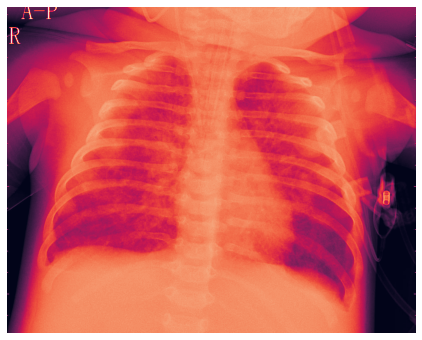

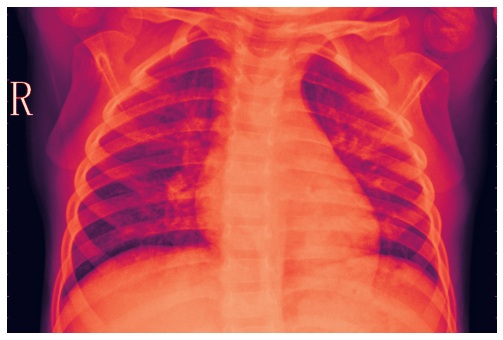

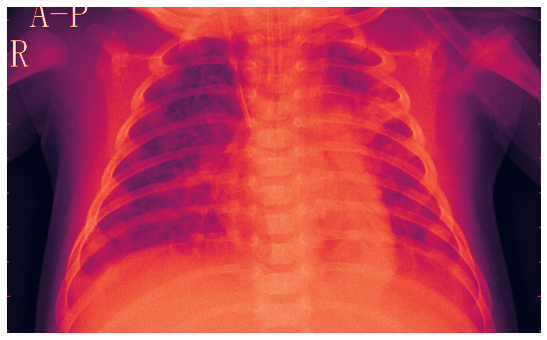

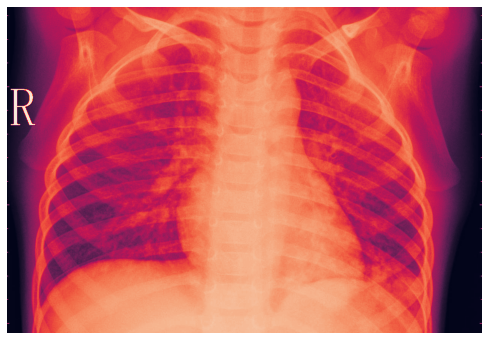

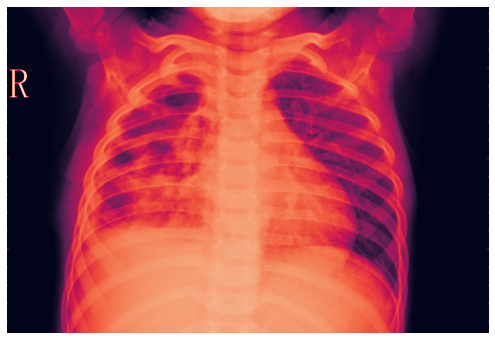

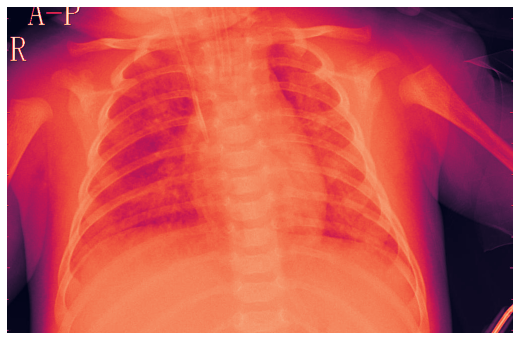

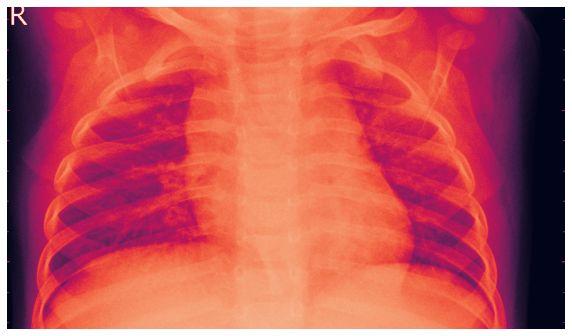

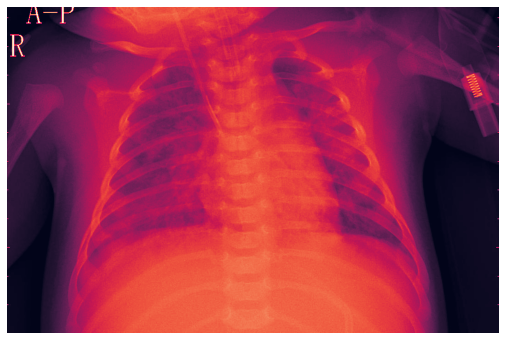

In [75]:
for images in os.listdir(val_folder_path + '/PNEUMONIA/' ):
  if (images.endswith(".png") or images.endswith(".jpeg")):
    image = Image.open(val_folder_path + '/PNEUMONIA/' + images)
    fig, ax = plt.subplots(1, figsize=(10,6))
    ax.axis('off')   
    plt.imshow(image)
    # convert the image into an array
    image_arr = np.array(image)
    # check the array shape
    print(image_arr.shape)

The image shape show that the queilty of images show overall that the colors are green and blue. It's a gray scale image as well. In the hist graph shows that in more detail

### Histographs

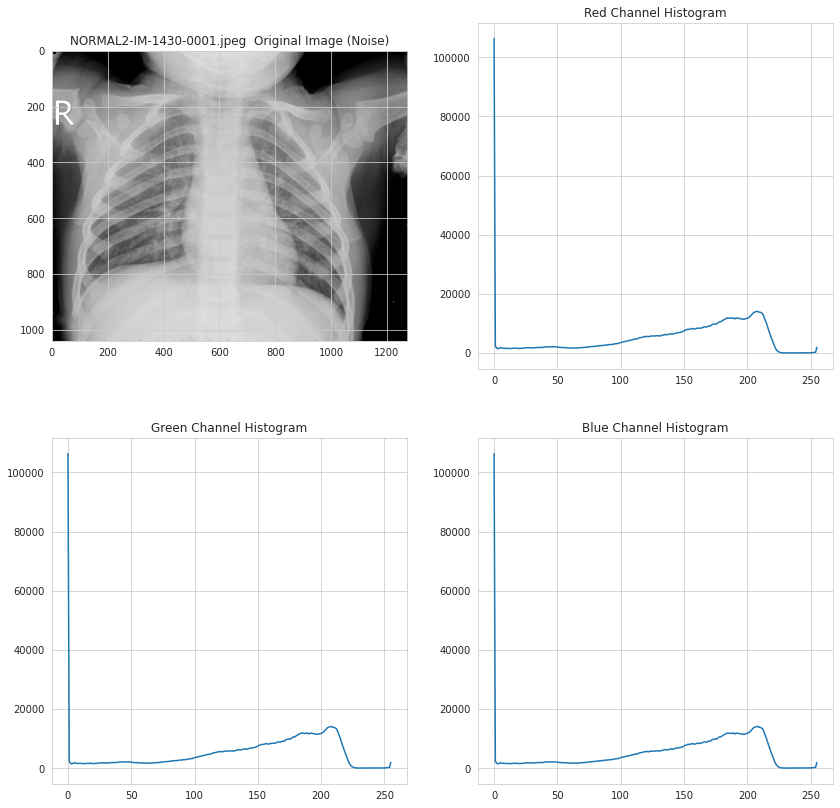

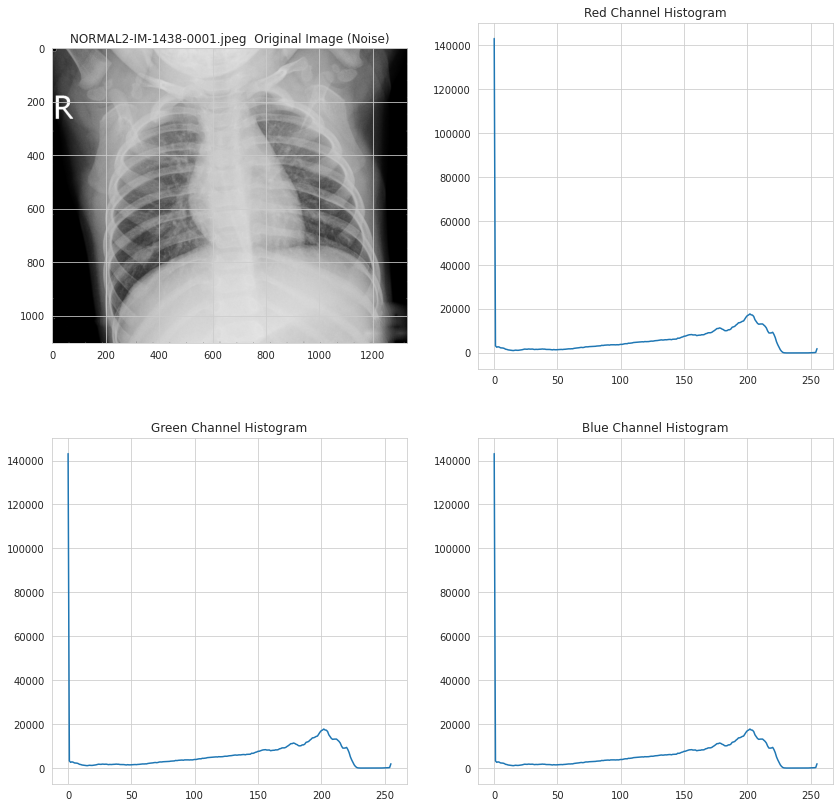

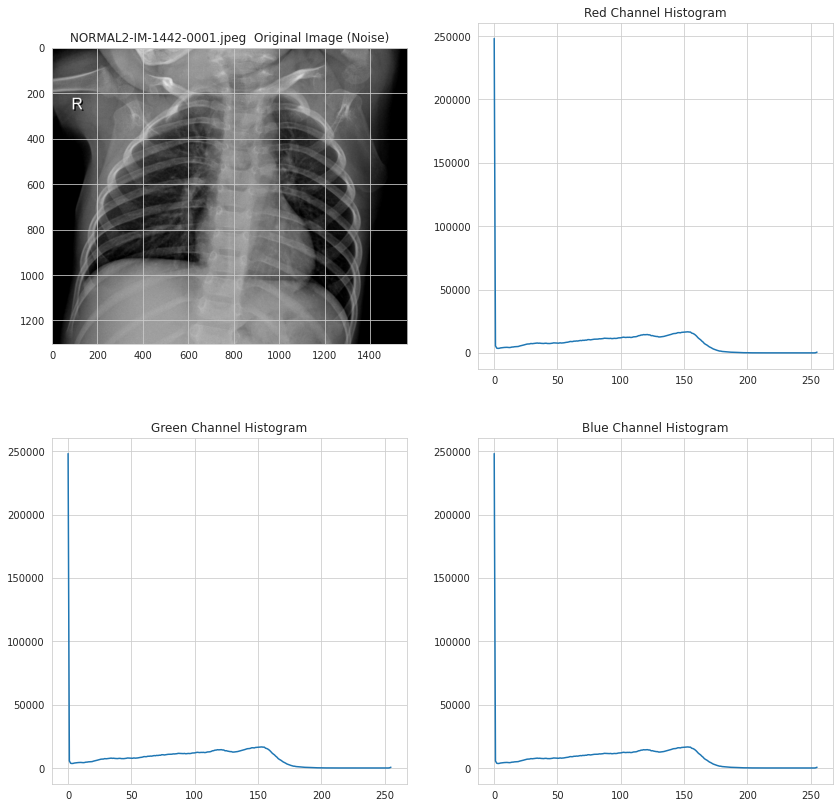

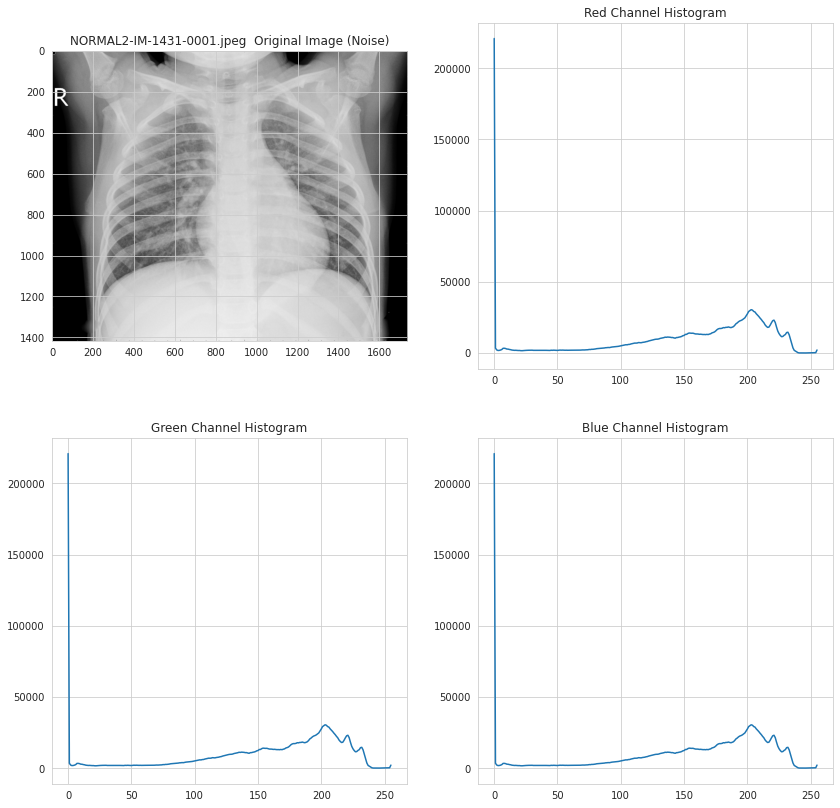

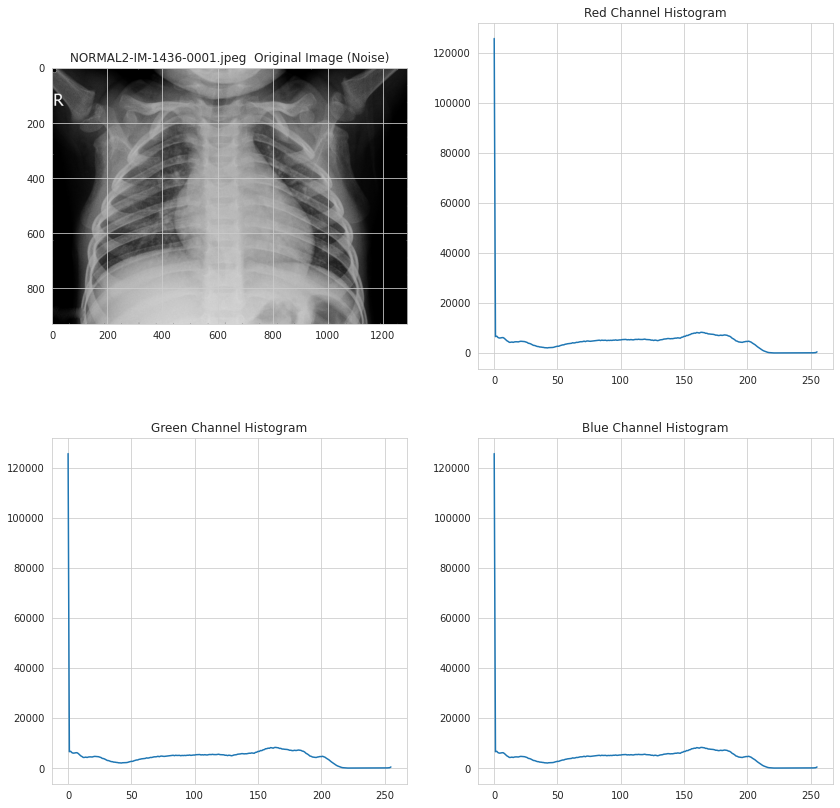

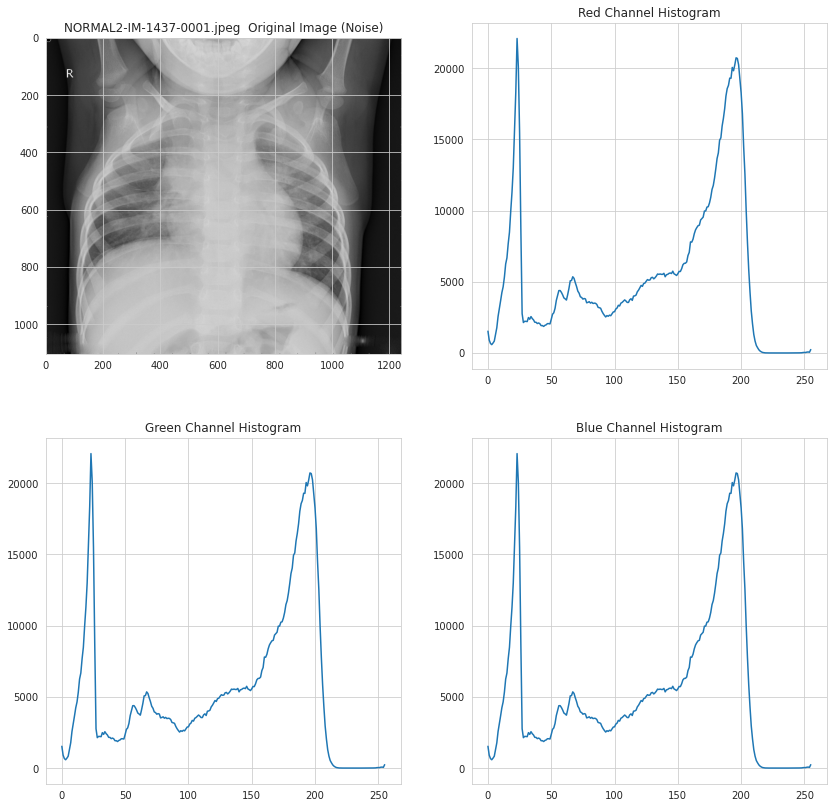

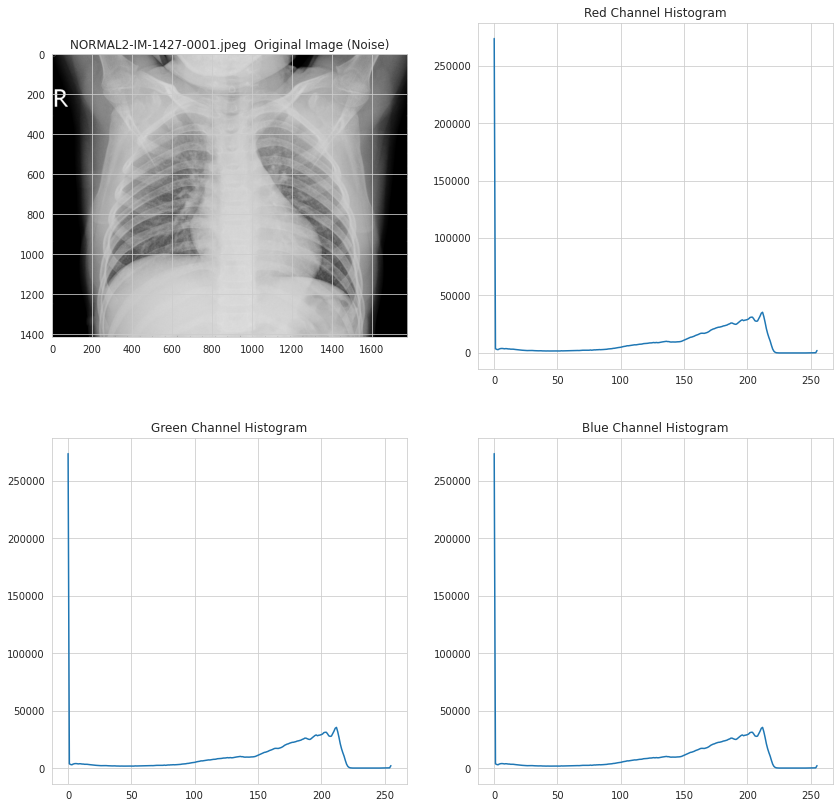

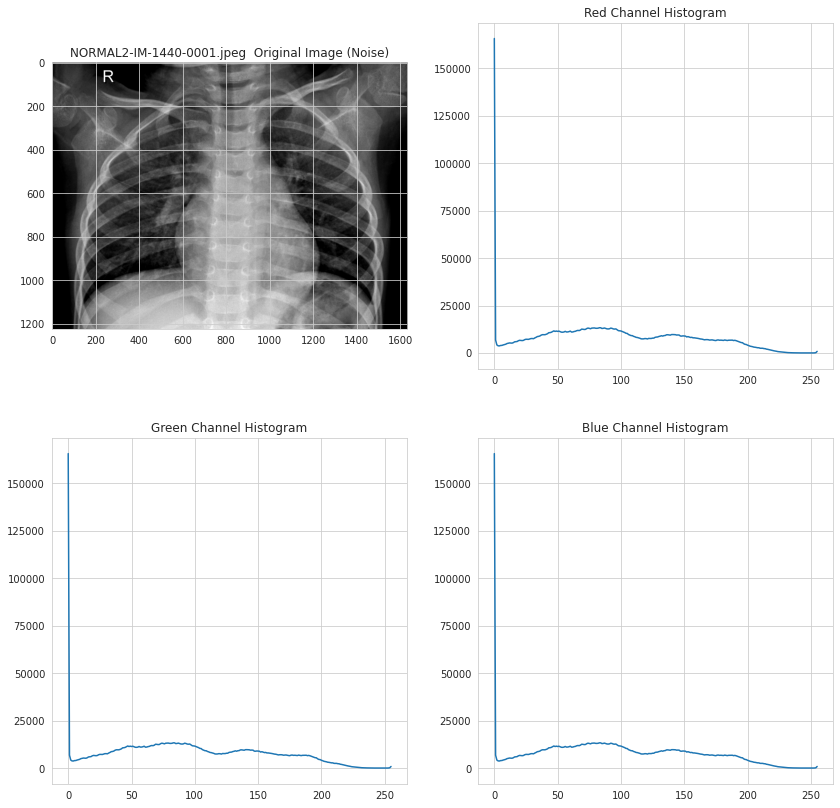

In [76]:
for images in os.listdir(val_folder_path + '/NORMAL/' ):
  
  image = cv2.imread(val_folder_path + '/NORMAL/' + images)

# Calculate histogram for the  three channels
  hist1 = cv2.calcHist([image],[0],None,[256],[0,256])
  hist2 = cv2.calcHist([image],[1],None,[256],[0,256])
  hist3 = cv2.calcHist([image],[2],None,[256],[0,256])

  # show original image
  fig = plt.figure(figsize=(14,14))
  ax1 = fig.add_subplot(221)
  plt.imshow(image)

  # Red

  ax2 = fig.add_subplot(222)
  plt.plot(hist1)

  # Green
  ax3 = fig.add_subplot(223)
  plt.plot(hist2)

  # Blue

  
  ax4 = fig.add_subplot(224)
  plt.plot(hist3)
  ax1.title.set_text(images + ' ' +' Original Image (Noise)')
  ax2.title.set_text('Red Channel Histogram')
  ax3.title.set_text('Green Channel Histogram')
  ax4.title.set_text('Blue Channel Histogram')

  plt.show()
 

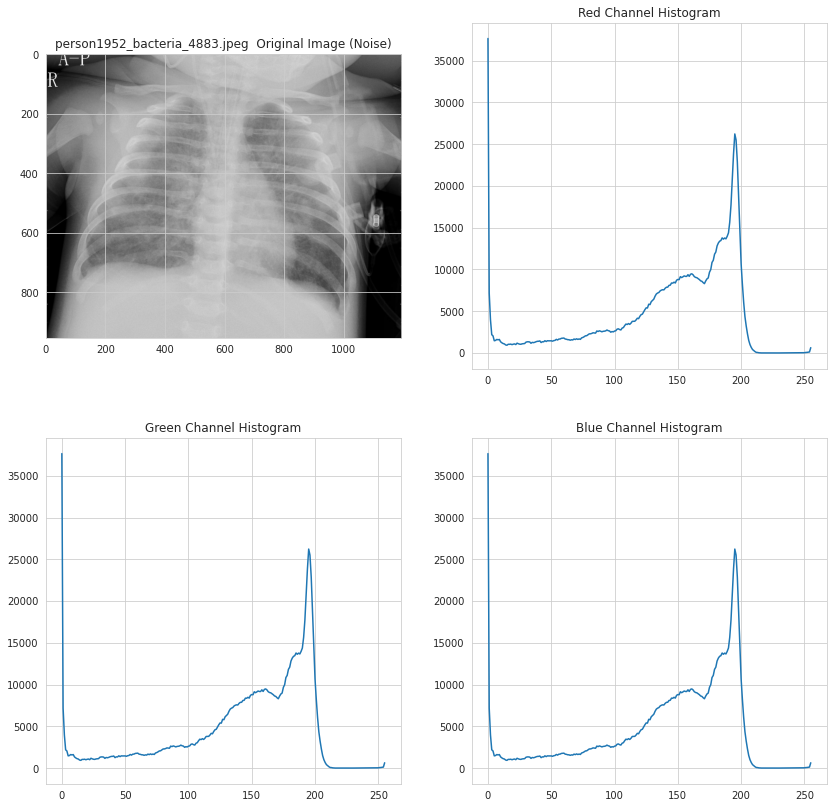

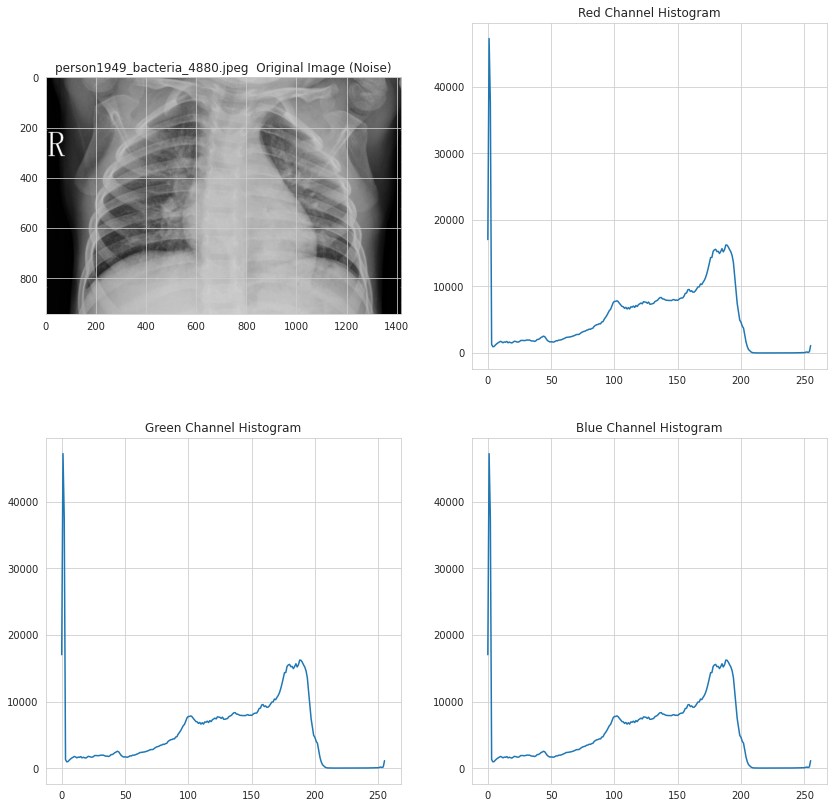

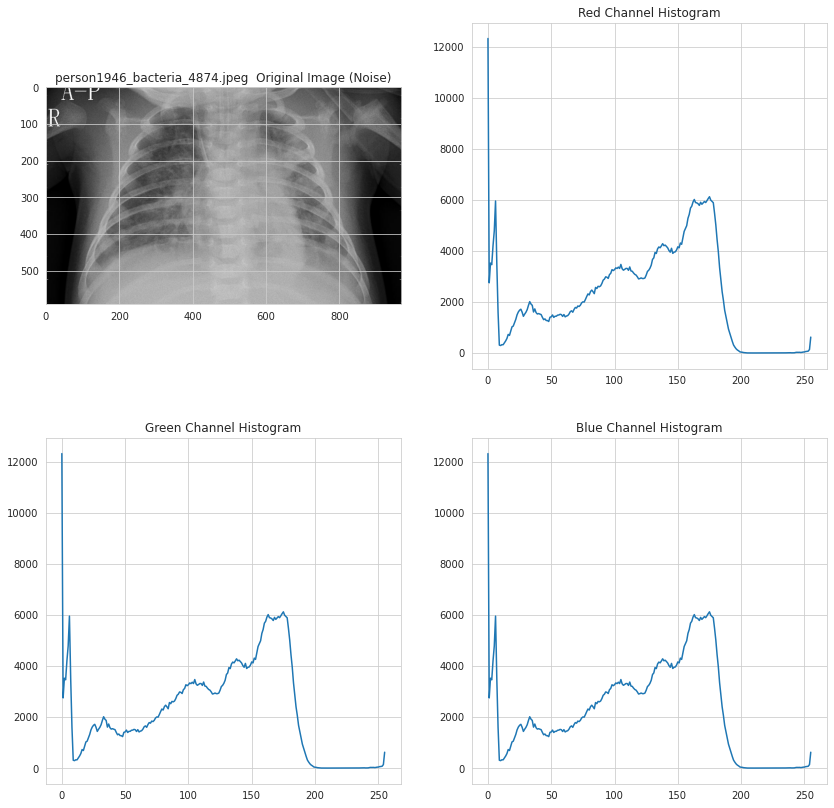

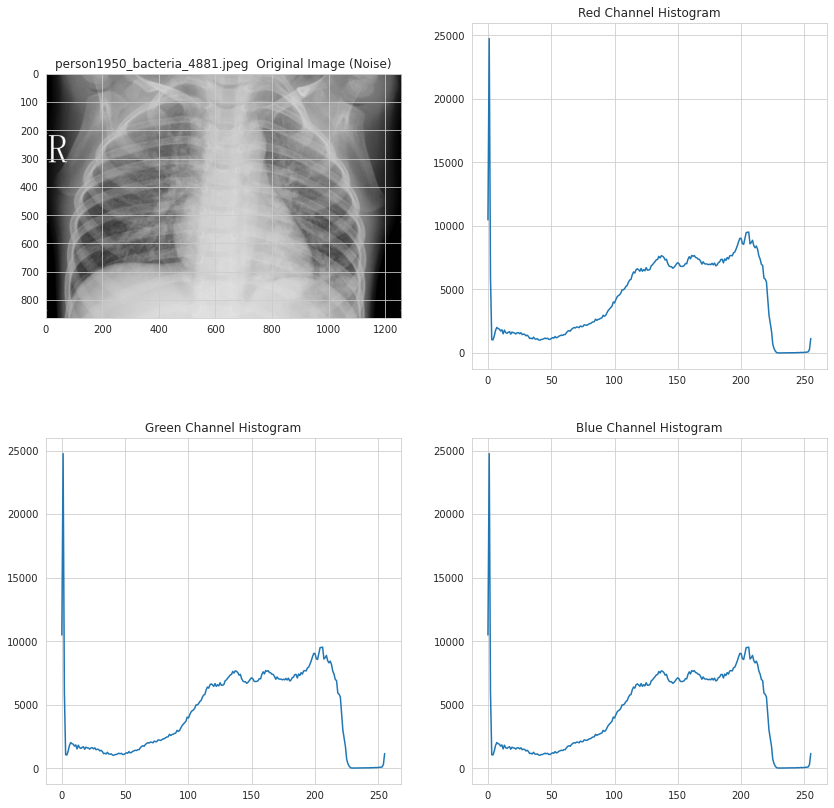

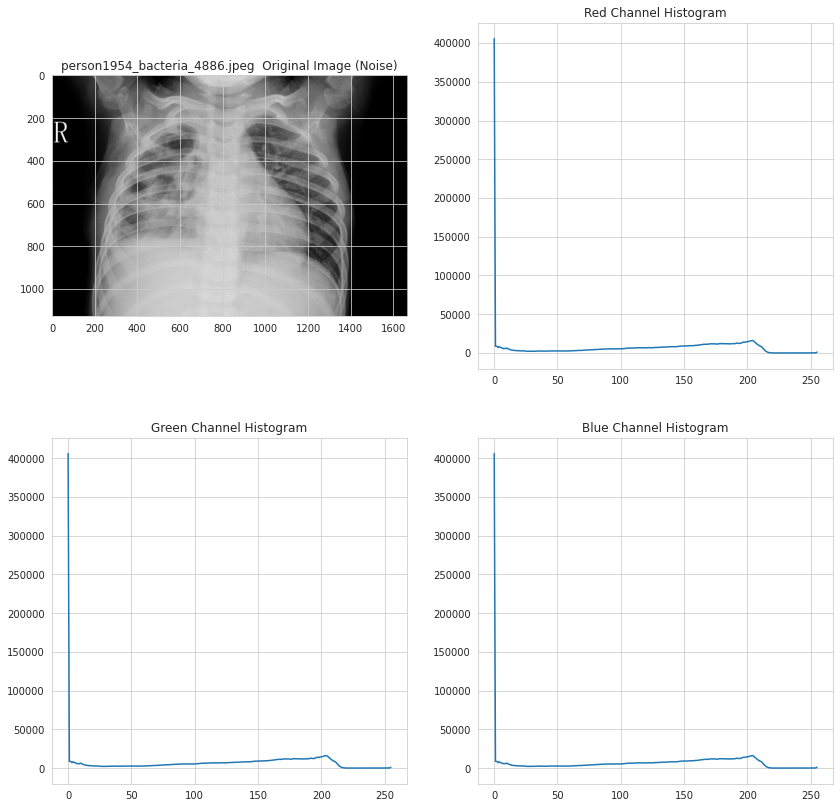

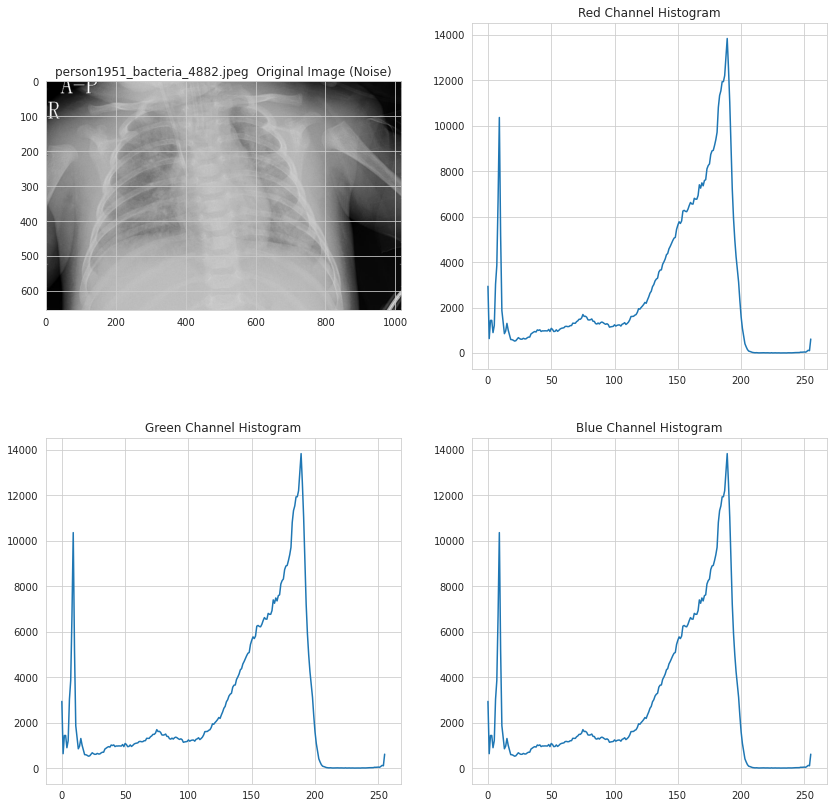

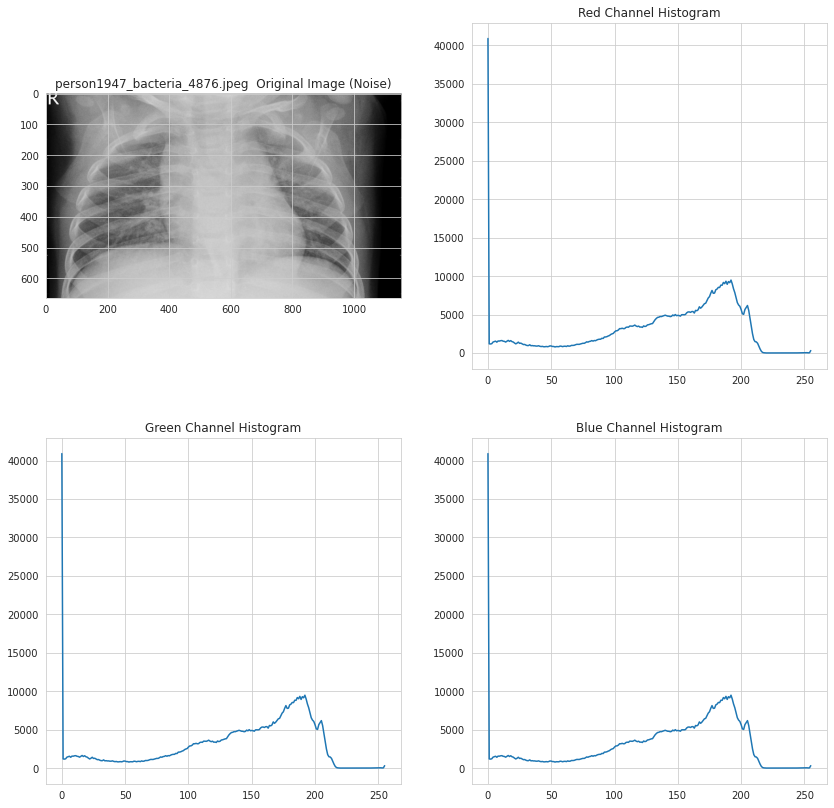

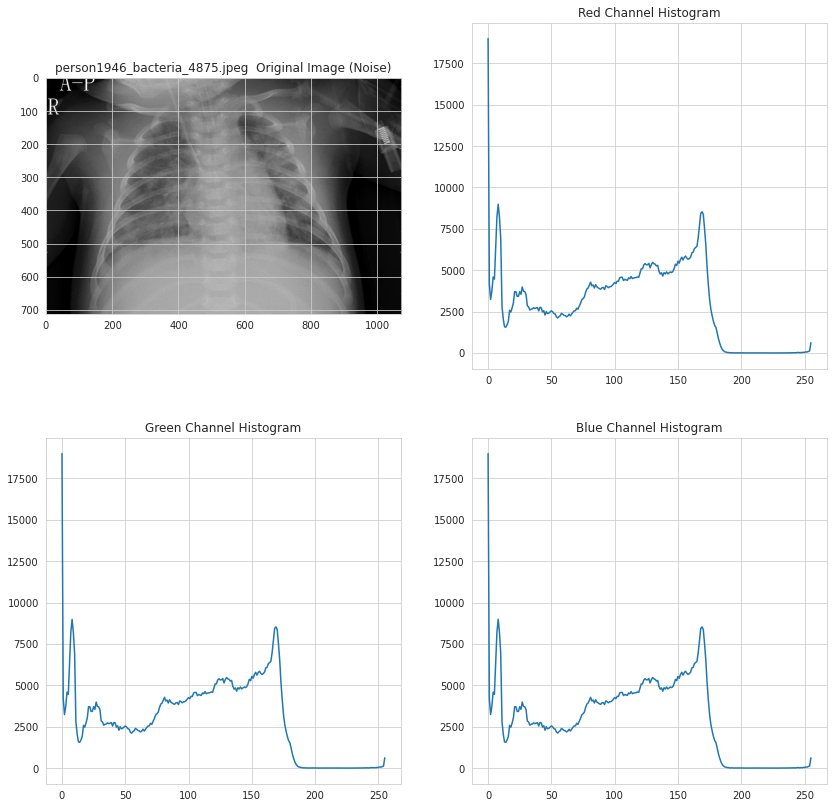

In [77]:
for images in os.listdir(val_folder_path + '/PNEUMONIA/' ):
  
  image = cv2.imread(val_folder_path + '/PNEUMONIA/' + images)

# Calculate histogram for the  three channels
  hist1 = cv2.calcHist([image],[0],None,[256],[0,256])
  hist2 = cv2.calcHist([image],[1],None,[256],[0,256])
  hist3 = cv2.calcHist([image],[2],None,[256],[0,256])

  # show original image
  fig = plt.figure(figsize=(14,14))
  ax1 = fig.add_subplot(221)
  plt.imshow(image)

  # Red

  ax2 = fig.add_subplot(222)
  plt.plot(hist1)

  # Green
  ax3 = fig.add_subplot(223)
  plt.plot(hist2)

  # Blue

  
  ax4 = fig.add_subplot(224)
  plt.plot(hist3)
  ax1.title.set_text(images + ' ' +' Original Image (Noise)')
  ax2.title.set_text('Red Channel Histogram')
  ax3.title.set_text('Green Channel Histogram')
  ax4.title.set_text('Blue Channel Histogram')

  plt.show()
 


### Results of the histograph
The results shows that the fraquency more overall in the the bractical vaild data. The normal data shows that the data has less colour to the data. 


# Baseline model
The base line model is based on lab5 work that was done in the class. the model will allow them to set the standard of the nerual network. The(Szepesi, P. and Szilágyi, L,(2022)),  The paper is much more recent paper and has impact factor over 4.00 then research paper that is given above . paper uses a model resize has the same image size as the research paper but uses a vgg pretrined model the parper use a optimiser for the model is Adam and epoch used 100 epoch but say 30 epoch is enough to show no overfitting. the model uses dropout where sone of the neurons are not used. By using the dropout it can have more hidden layer and making more acuate. 

The model architecture have been copied form this model

Szepesi, P. and Szilágyi, L. (2022) “Detection of pneumonia using convolutional neural networks and Deep Learning,” Biocybernetics and Biomedical Engineering, 42(3), pp. 1012–1022. Available at: https://doi.org/10.1016/j.bbe.2022.08.001. 

In [81]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [79]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

datagen = ImageDataGenerator(

      featurewise_center=False, 
      samplewise_center=False, 
      featurewise_std_normalization=False, 
      samplewise_std_normalization=False, 
      zca_whitening=False, 
      rotation_range = 30, 
      zoom_range = 0.2, 
      
      width_shift_range = 0.1, 
      height_shift_range = 0.1, 
      horizontal_flip = True, 
      vertical_flip=False) 

datagen.fit(x_train)

In [83]:
# Normalise the data 

x_train = np.array(x_train) / 255.0
x_val = np.array(x_val) / 255.0
x_test = np.array(x_test) / 255.0

In [84]:

x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

building the CNN Model
the CNN model which is based on the research paper 

In [85]:
## Model setup
model = Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(128, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(256, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))
LEARN_RATE = 1e-4
from tensorflow.keras.optimizers import Adam
model.compile(
              optimizer = Adam(lr = LEARN_RATE), loss = 'binary_crossentropy', 
              metrics = ['accuracy']
              )


In [86]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 batch_normalization_6 (Batc  (None, 112, 112, 64)    

In [ ]:

"""from keras import layers, Model, backend
channel_axis = -1# if backend.image_data_format() == 'channels_first' else -1
def model():
    img_input = layers.Input(shape = (img_size, img_size, 3))
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv1')(img_input)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn1')(x)
    x = layers.Activation('relu', name = 'block1_act1')(x)
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn2')(x)
    x = layers.Activation('relu', name = 'block1_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block1_pool')(x)

    # block 2
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn1')(x)
    x = layers.Activation('relu', name = 'block2_act1')(x)
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn2')(x)
    x = layers.Activation('relu', name = 'block2_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block2_pool')(x)

    # block 3
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn1')(x)
    x = layers.Activation('relu', name = 'block3_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn2')(x)
    x = layers.Activation('relu', name = 'block311_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block3_pool')(x)

    x = layers.Conv2D(256, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn1')(x)
    x = layers.Activation('relu', name = 'block31_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn2')(x)
    x = layers.Activation('relu', name = 'block31_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block31_pool')(x)

  # block 4
    x = layers.Conv2D(1024, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block41_bn1')(x)
    x = layers.Activation('relu', name = 'block41_act1')(x)
    x = layers.Conv2D(512, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv2')(x)
    x = layers.Dropout(0.5, name = 'block4_dropout')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block4_bn2')(x)
    x = layers.Activation('relu', name = 'block4_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block4_pool')(x)
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(512, activation='relu', name='fc1')(x)
    x = layers.Dense(1024, activation='relu', name='fc11')(x)
    x = layers.Dense(512, activation='relu', name='fc3')(x)
    x = layers.Dense(512, activation='relu', name='fc4')(x)
    x = layers.Dense(256, activation='relu', name='fc5')(x)
    x = layers.Dense(64, activation='relu', name='fc6')(x)
    x = layers.Dense(2, activation='softmax', name='predictions')(x)
    model = Model(inputs=img_input, outputs=x, name = 'own_build_model')
    return model
model = model()
model.summary()"""

In [ ]:

LEARN_RATE = 1e-4
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(lr = LEARN_RATE), loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [87]:
total = len(os.listdir(train_n_path)) + len(os.listdir(train_p_path))
neg = len(os.listdir(train_n_path))
pos = len(os.listdir(train_p_path))

weight_for_0 = 1 /neg * (total/2.0)
weight_for_1 = 1/pos *(total/2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 1.939214232765011, 1: 0.6737058975019315}

In [ ]:

from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}.best_only.hdf5".format('save')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, 
                              patience=5, verbose=1, mode='auto', 
                              epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=40) # probably needs to be more patient, but kaggle time is limited
#callbacks_list = [checkpoint, early,reduceLROnPlat,class_weight]

In [88]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, factor = 0.3, min_lr = 0.000001)

In [89]:
history = model.fit(datagen.flow(x_train, y_train, batch_size = batch_size), 
                    epochs = n_epochs, validation_data = datagen.flow(x_val, y_val), 
                    callbacks = [learning_rate_reduction], class_weight = class_weight)

Epoch 1/30
262/262 [==============================] - 65s 192ms/step - loss: 0.5436 - accuracy: 0.8315 - val_loss: 4.5959 - val_accuracy: 0.7249 - lr: 0.0010
Epoch 2/30
262/262 [==============================] - 51s 196ms/step - loss: 0.3055 - accuracy: 0.8724 - val_loss: 6.8313 - val_accuracy: 0.7249 - lr: 0.0010
Epoch 3/30
262/262 [==============================] - 51s 195ms/step - loss: 0.2582 - accuracy: 0.8932 - val_loss: 1.1973 - val_accuracy: 0.7841 - lr: 0.0010
Epoch 4/30
262/262 [==============================] - 51s 195ms/step - loss: 0.2444 - accuracy: 0.9056 - val_loss: 13.3187 - val_accuracy: 0.7249 - lr: 0.0010
Epoch 5/30
262/262 [==============================] - ETA: 0s - loss: 0.2095 - accuracy: 0.9164
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
262/262 [==============================] - 52s 198ms/step - loss: 0.2095 - accuracy: 0.9164 - val_loss: 3.8687 - val_accuracy: 0.7249 - lr: 0.0010
Epoch 6/30
262/262 [============================

<Axes: >

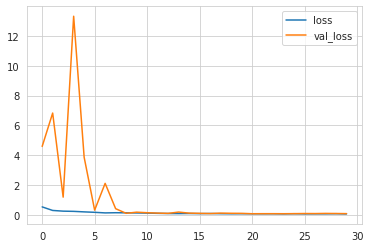

In [90]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<Axes: >

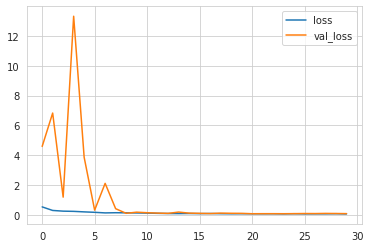

In [91]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [92]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 0s 13ms/step - loss: 0.1884 - accuracy: 0.9413
Loss of the model is -  0.18841858208179474
20/20 [==============================] - 4s 204ms/step - loss: 0.1884 - accuracy: 0.9413
Accuracy of the model is -  94.12698149681091 %


## the results 
the accuracy of the model show that the model showed the over all is 93.3% overall accuracy. the overall result is 0.18 of model.



## eveluation 
the evaluation is showing in the matrix model. and the percsion and is also below 

In [93]:
from tensorflow.keras.models import load_model
#model.save('CNN_PNEUMONIA.h5') # 
#cnn_model = load_model("./CNN_PNEUMONIA.h5")
predictions=model.predict(x_test) 
pred_labels= np.where(predictions>0.5, 1, 0)

20/20 [==============================] - 2s 72ms/step


In [94]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, pred_labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.91      0.94      0.92       234
   Normal (Class 1)       0.96      0.94      0.95       396

           accuracy                           0.94       630
          macro avg       0.94      0.94      0.94       630
       weighted avg       0.94      0.94      0.94       630



The precision factor for the pnerumonia is 93% and which is: $$ precision=\frac{TP}{TP+FP}$$ the shows overall that the model pretdicted 93% postive  true  then 7% as false postives which is when the data is label is wrong.The recall of the pneumonia class is 89%: which is: $$recall=\frac{TP}{TP+FN}$$

this shows that the true postives show that model recalled with that 89% was true and 11% was pridicted wrong. the suggest that only the only 
